In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_wandb_csv():
    df = pd.read_csv("wandb_export.csv")
    target_cols = [el for el in df.columns if "mean" in el[-4:]]

    target_cols.append("epoch_id")
    filtered_df = df[target_cols]

    return filtered_df

In [3]:
def rename_fn(input_str):
    if input_str == "epoch_id":
        return input_str
    str_list = input_str.split('-')
    out = "-".join([str_list[0], str_list[1]])
    return out

In [4]:
mydf = read_wandb_csv()
df = mydf.rename(columns=lambda s: rename_fn(s))
df = df.melt(id_vars="epoch_id")
out = df.rename(columns={"variable": "wandb-run", "value": "Perf"})
out['Train'] = None
out['Encoder'] = None
out

,epoch_id,wandb-run,Perf,Train,Encoder
0,0,breezy-cloud,1.260184,None,None
1,10,breezy-cloud,2.970999,None,None
2,20,breezy-cloud,2.776531,None,None
3,30,breezy-cloud,2.841402,None,None
4,40,breezy-cloud,2.898227,None,None
...,...,...,...,...,...
4209,2960,floral-salad,1.159024,None,None
4210,2970,floral-salad,1.161539,None,None
4211,2980,floral-salad,1.137764,None,None
4212,2990,floral-salad,1.160617,None,None


In [5]:
# run_names = [
#     'breezy-cloud', 
#     'rare-waterfall', 
#     'fast-waterfall',
#     'elated-dragon', 
#     'super-fog', 
#     'legendary-terrain', 
#     'deep-forest',
#     'misunderstood-river', 
#     'ethereal-eon',
#     'worthy-tree',
#     'giddy-yogurt', 
#     'fallen-snowflake', 
#     'crimson-smoke',
#     'floral-salad'
# ]
mitga_runs = [
    'breezy-cloud', 
    'rare-waterfall',
    'fast-waterfall',
    'ethereal-eon',
    'worthy-tree',
    'giddy-yogurt', 
    'floral-salad'
    ]

gn_runs = [
    'elated-dragon', 
    'super-fog', 
    'legendary-terrain', 
    'deep-forest',
    'misunderstood-river', 
    'fallen-snowflake', 
    'crimson-smoke',
]
ppo_runs = [
    'breezy-cloud', 
    'rare-waterfall', 
    'fast-waterfall',
    'elated-dragon', 
    'super-fog', 
    'legendary-terrain', 
    'deep-forest',

]
cr_runs = [
    'misunderstood-river', 
    'ethereal-eon',
    'worthy-tree',
    'giddy-yogurt', 
    'fallen-snowflake', 
    'crimson-smoke',
    'floral-salad'
]
def map_train(run_name):
    if run_name in ppo_runs:
        return "PPO"
    else:
        return "CR"

def map_encoder(run_name):
    if run_name in mitga_runs:
        return "MITGA"
    else:
        return "GN"
    

In [6]:
out['Train'] = out['wandb-run'].apply(map_train)
out['Encoder'] = out['wandb-run'].apply(map_encoder)
out

,epoch_id,wandb-run,Perf,Train,Encoder
0,0,breezy-cloud,1.260184,PPO,MITGA
1,10,breezy-cloud,2.970999,PPO,MITGA
2,20,breezy-cloud,2.776531,PPO,MITGA
3,30,breezy-cloud,2.841402,PPO,MITGA
4,40,breezy-cloud,2.898227,PPO,MITGA
...,...,...,...,...,...
4209,2960,floral-salad,1.159024,CR,MITGA
4210,2970,floral-salad,1.161539,CR,MITGA
4211,2980,floral-salad,1.137764,CR,MITGA
4212,2990,floral-salad,1.160617,CR,MITGA


Text(0, 0.5, 'Norm. Validation performance')

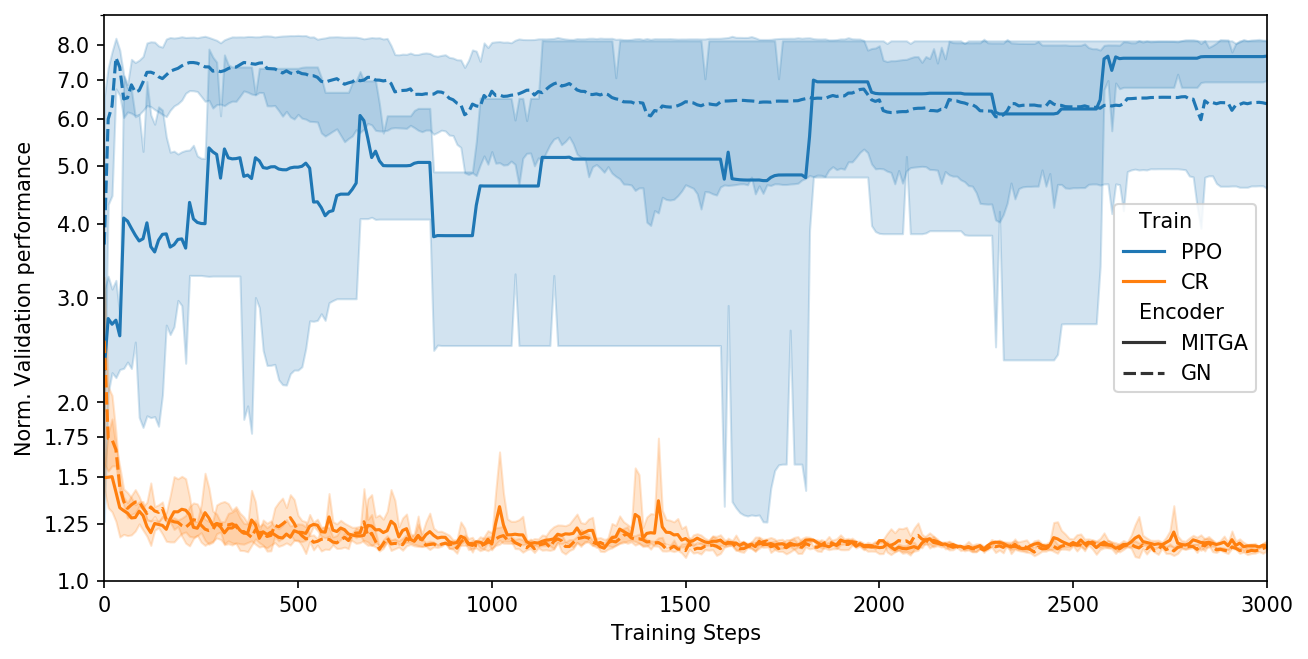

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10, 5), dpi=150)
ax = sns.lineplot(data=out, x="epoch_id", y="Perf", hue="Train", style='Encoder', ax=ax)
c = np.concatenate([np.arange(1, 2, 0.25).round(2), np.arange(2, 9, 1)])
# ax.yaxis.set_ticks(c) 
# ax.yaxis.set_ticklabels(c.astype('str'))
plt.yscale('log')
ax.yaxis.set_major_locator(plt.FixedLocator(c))
ax.yaxis.set_major_formatter(plt.FixedFormatter(c))

plt.xlim([0, 3000])
plt.ylim([1, 9])
plt.xlabel("Training Steps")
plt.ylabel("Norm. Validation performance")